![](Z_resonance.jpg)

The figure shows the cross section of:

$$e^+ e^- \rightarrow Z \rightarrow \text{hadrons}$$

as a function of center of mass energy. The expression for the resonance is given by:

$$
\sigma(e^+ e^- \rightarrow Z \rightarrow f\bar f) = \frac{12\pi}{m_Z^2} \frac{s}{(s-m_Z^2)^2 + m_Z^2 \Gamma_Z^2} \Gamma_{ee}\Gamma_{ff}
$$

where $m_Z$ is the $Z$ mass, $s$ is the center of mass energy of electrons, $\Gamma_Z$ is the total width of the $Z$ and $\Gamma_{ee}$, $\Gamma_{f\bar f}$ are the partial widths to electorn-positron and generic fermion-antifermion pairs.

(from http://www.hep.phy.cam.ac.uk/~thomson/lectures/partIIIparticles/Handout14_2009.pdf)

The total width of the $Z$ can also be written as a sum of its partial widths:

$$
\Gamma_Z = \sum_{f} \Gamma_{f\bar f} = \Gamma_{vis} + N_\nu \Gamma_{\nu}
$$

Where we have collected the charged lepton and quark widths into the visible partial widths, and the neutrinos $\nu$ form the invisible contribution to the width. $N_\nu$ is the number of light neutrinos, and $\Gamma_\nu$ is the partial width of the $Z$ to a neutrino pair. Hence, the cross section can be written as:

$$
\sigma(e^+ e^- \rightarrow Z \rightarrow f\bar f) = \frac{12\pi}{m_Z^2} \frac{s}{(s-m_Z^2)^2 + m_Z^2 (\Gamma_{vis} + N_\nu \Gamma_{\nu})^2} \Gamma_{ee}\Gamma_{ff}
$$

where all the quantities in the expression (apart from $N_\nu$ of course) are independent of the number of light neutrinos. One can solve for $s$ at Full Width Half Maximum (FWHM) to give:

$$
E_{+,-} = \sqrt{s_{+,-}} = m_Z^2 + \Gamma_Z^2 \pm \sqrt{m_Z^2 + \Gamma_Z^2}
$$

In [2]:
import numpy as np

# some constants
Gamma_nu = 0.1663 # GeV
Gamma_ee = 0.0839
Gamma_had = 1.7444
Gamma_vis = 1.9963
m_Z = 91.187

# cross section function
def xsection(E, N_nu):
    s = E**2
    prefactor = 12*np.pi/m_Z**2
    top = s
    bottom = (s-m_Z**2)**2 + m_Z**2 * (Gamma_vis+N_nu*Gamma_nu)**2
    postfactor = Gamma_ee*Gamma_had
    return 10000*prefactor*top/bottom*postfactor

# centerof mass energy
def E_com(width, sign):
    return (m_Z**2 + width**2 + sign*width*(m_Z**2 + width**2)**0.5)**0.5

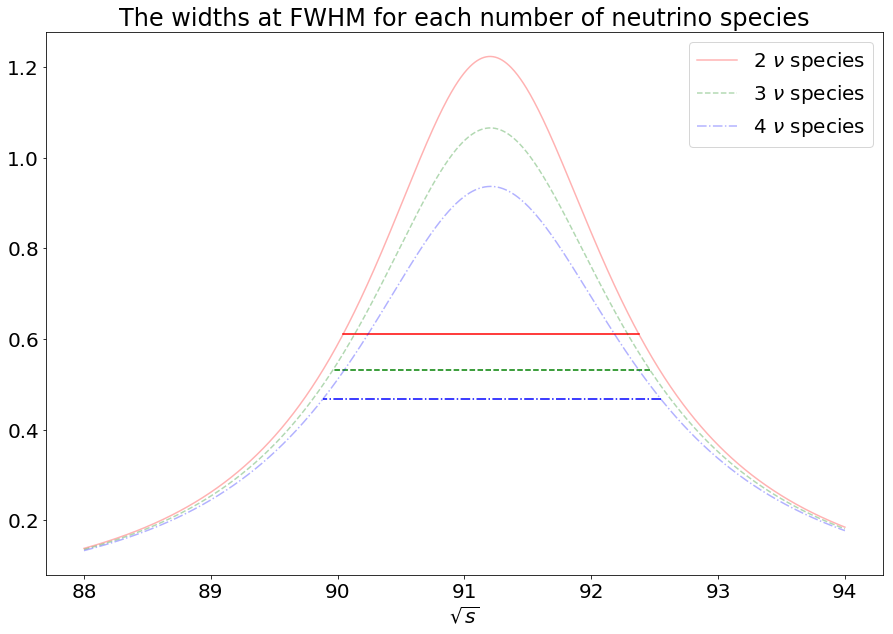

In [3]:
import matplotlib.pyplot as plt 
import matplotlib as mpl

# set font size
mpl.rcParams['font.size']=20

# prepare the xs and ys for the plots 
Es = np.linspace(88, 94, 1000)

nspecies = range(2,5)
xsections = [xsection(Es, n) for n in nspecies] 
maxes = [xsection(m_Z, n) for n in nspecies]
widths = [Gamma_vis + n*Gamma_nu for n in nspecies]
E_lows = [E_com(width, 1) for width in widths]
E_highs = [E_com(width, -1) for width in widths]

# plot
fig, ax = plt.subplots(1, figsize=(15,10))
styles = ['r-', 'g--', 'b-.']
for i, n in enumerate(nspecies):
    ax.plot(Es, xsections[i], styles[i], label=str(n)+r' $\nu$ species', alpha=0.3)
    ax.plot([E_lows[i],E_highs[i]], [maxes[i]/2, maxes[i]/2], styles[i])
ax.set_xlabel('$\sqrt{s}$')
ax.set_title('The widths at FWHM for each number of neutrino species')
plt.legend()
plt.show()

So indeed the four neutrino species is the widest, but has the lowest maximum. It only appeared to be the narrowest one, because I compared their widths at the same cross section.